<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Machine_Learn_methods_enseble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datascience
!pip install -q pandas-profiling

     |████████████████████████████████| 69 kB 4.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as sp
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [4]:
path = '/content/drive/MyDrive/diabetes.xlsx'

In [5]:
!pip3 uninstall openpyxl
!pip3 install openpyxl 

Found existing installation: openpyxl 2.5.9
Uninstalling openpyxl-2.5.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/openpyxl-2.5.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/openpyxl/*
Proceed (y/n)? y
  Successfully uninstalled openpyxl-2.5.9
     |████████████████████████████████| 242 kB 7.3 MB/s 


In [6]:
df = pd.read_excel(path)

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df.shape

(768, 9)

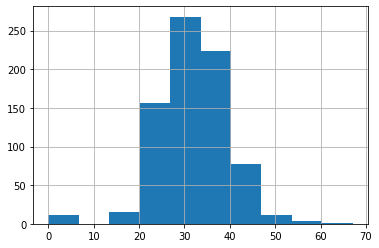

In [9]:
df['BMI'].hist()

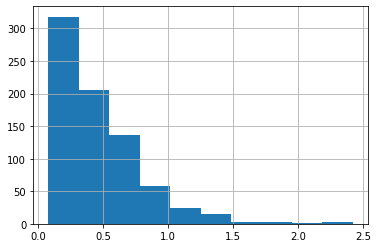

In [10]:
df['DiabetesPedigreeFunction'].hist()

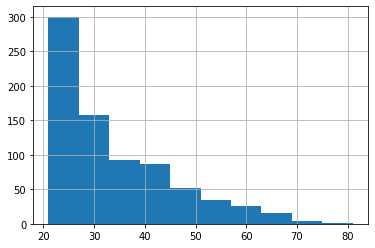

In [11]:
df['Age'].hist()

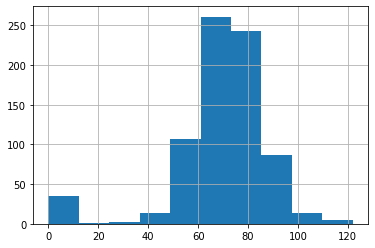

In [12]:
df['BloodPressure'].hist()

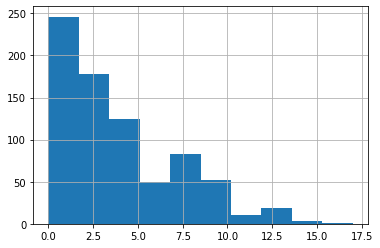

In [13]:
df['Pregnancies'].hist()

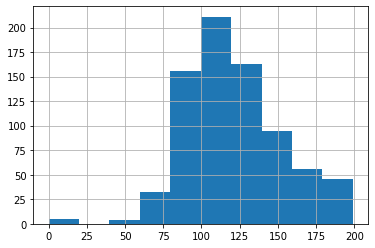

In [14]:
df['Glucose'].hist()

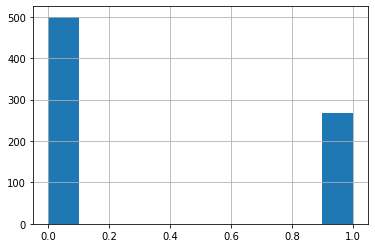

In [15]:
df['Outcome'].hist()

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [20]:
#Replacing the zero values for Blood Pressure
df1 = df.loc[df['Outcome'] ==1]
df2 = df.loc[df['Outcome'] ==0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [21]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
245,9,184,85,15,0,30.0,1.213,49,1
254,12,92,62,7,258,27.6,0.926,44,1
255,1,113,64,35,0,33.6,0.543,21,1
259,11,155,76,28,150,33.3,1.353,51,1


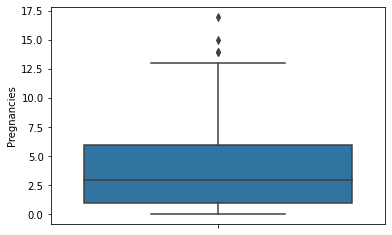

In [22]:
sns.boxplot(y='Pregnancies', data=df, showfliers = True)

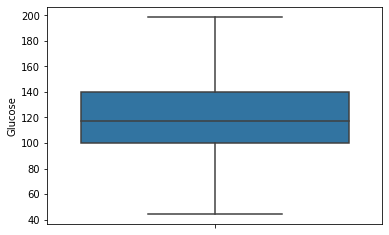

In [23]:
sns.boxplot(y='Glucose',data=df)

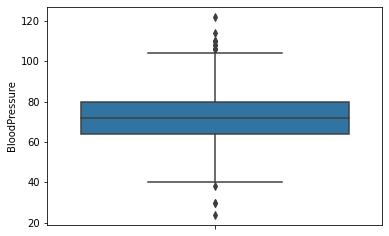

In [24]:
sns.boxplot(y='BloodPressure',data=df)

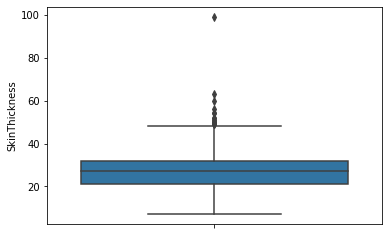

In [25]:
sns.boxplot(y='SkinThickness', data=df)

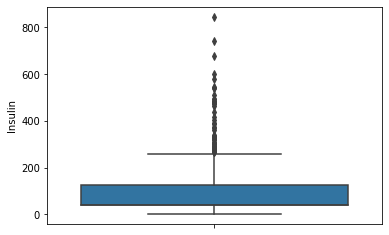

In [26]:
sns.boxplot(y='Insulin', data=df)

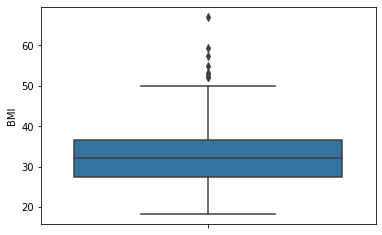

In [27]:
sns.boxplot(y='BMI', data=df)

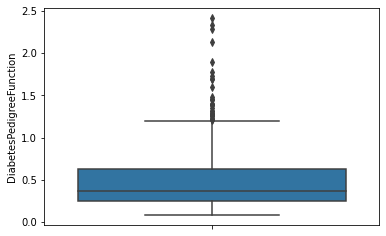

In [28]:
sns.boxplot(y='DiabetesPedigreeFunction', data=df)

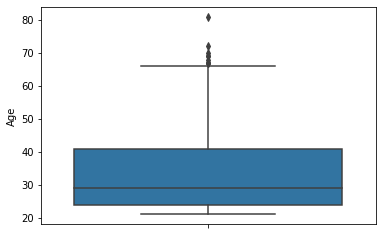

In [29]:
sns.boxplot(y='Age', data=df)

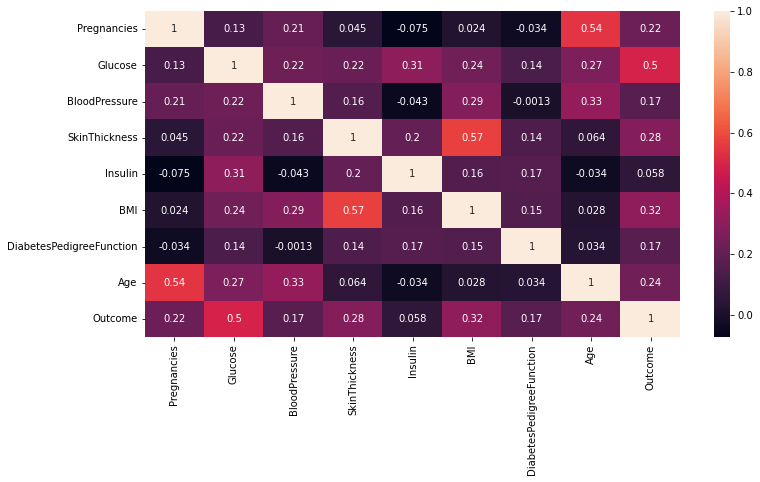

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)


In [31]:
min_out_Bld, max_out_Bld = df.BloodPressure.quantile([0.004, 0.99])
min_out_Bld, max_out_Bld

(38.135999999999996, 106.0)

In [32]:
df_b = df[(df.BloodPressure<max_out_Bld) & (df.BloodPressure>min_out_Bld)]

In [33]:
df_b.shape

(754, 9)

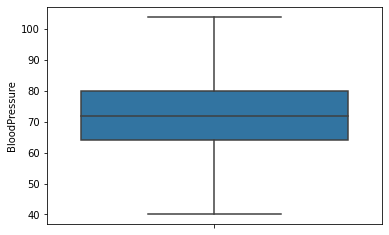

In [34]:
sns.boxplot(y='BloodPressure', data=df_b)

In [35]:
min_out_Preg, max_out_Preg = df.Pregnancies.quantile([0,0.9973])
min_out_Preg, max_out_Preg

(0.0, 14.0)

In [36]:
df_b = df[(df.Pregnancies<max_out_Preg)]

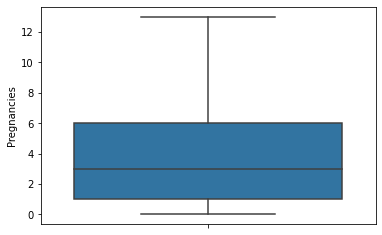

In [37]:
sns.boxplot(y='Pregnancies', data=df_b)

In [38]:
min_out_SknT, max_out_SknT = df.SkinThickness.quantile([0, 0.9843])
min_out_SknT, max_out_SknT

(7.0, 49.0)

In [39]:
df_b = df[(df.SkinThickness<max_out_SknT)]

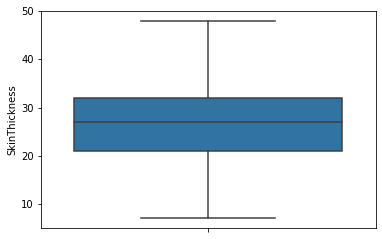

In [40]:
sns.boxplot(y='SkinThickness', data=df_b)

In [41]:
min_out_Ins, max_out_Ins = df.Insulin.quantile([0.179, 0.925])
min_out_Ins, max_out_Ins

(4.102000000000089, 246.9000000000001)

In [42]:
df_b = df[(df.Insulin<max_out_Ins) & (df.Insulin>min_out_Ins)]

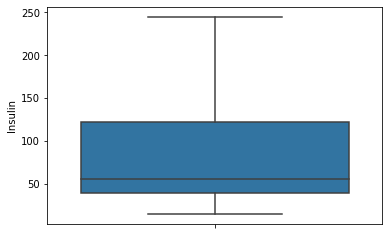

In [43]:
sns.boxplot(y='Insulin', data=df_b)

In [44]:
min_out_Bmi, max_out_Bmi = df.BMI.quantile([0, 0.989])
min_out_Bmi, max_out_Bmi

(18.2, 49.86890000000003)

In [45]:
df_b = df[(df.BMI<max_out_Bmi) & (df.BMI>min_out_Bmi)]

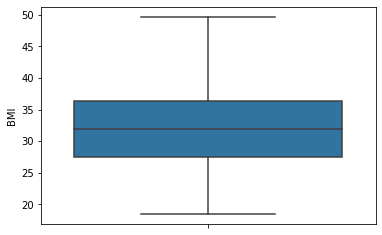

In [46]:
sns.boxplot(y='BMI', data=df_b)

In [47]:
min_out_Dpf, max_out_Dpf = df.DiabetesPedigreeFunction.quantile([0, 0.943])
min_out_Dpf, max_out_Dpf

(0.078, 1.081338999999999)

In [48]:
df_b = df[(df.DiabetesPedigreeFunction<max_out_Dpf)]

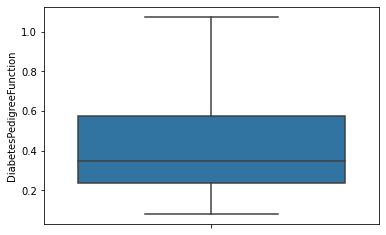

In [49]:
sns.boxplot(y='DiabetesPedigreeFunction', data=df_b)

In [50]:
min_out_Age, max_out_Age = df.Age.quantile([0, 0.983])
min_out_Age, max_out_Age

(21.0, 65.0)

In [51]:
df_b = df[(df.Age<max_out_Age)]

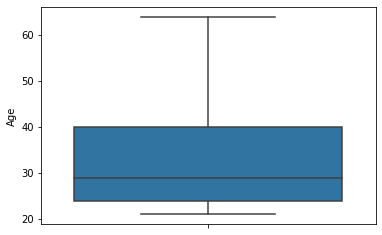

In [52]:
sns.boxplot(y='Age', data=df_b)

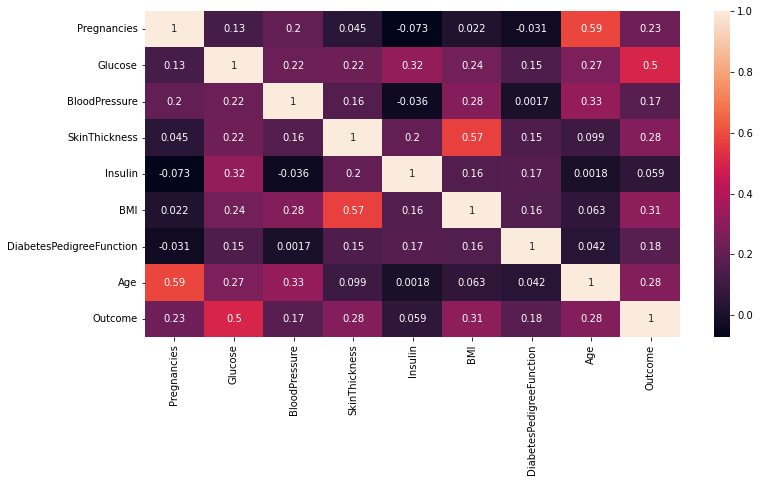

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df_b.corr(), annot=True)

In [54]:
df_b.shape

(752, 9)

In [55]:
df_b.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.627,50,1
2,8,183,64,27,0,23.30,0.672,32,1
4,0,137,40,35,168,43.10,2.288,33,1
6,3,78,50,32,88,31.00,0.248,26,1
8,2,197,70,45,543,30.50,0.158,53,1
9,8,125,96,27,0,34.25,0.232,54,1
11,10,168,74,27,0,38.00,0.537,34,1
13,1,189,60,23,846,30.10,0.398,59,1
14,5,166,72,19,175,25.80,0.587,51,1
15,7,100,74,27,0,30.00,0.484,32,1


In [56]:
scaling = MinMaxScaler()

In [57]:
df_b[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]=scaling.fit_transform(df_b[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [58]:
df_b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.000000,0.314928,0.234415,0.674419,1
2,0.470588,0.896774,0.408163,0.217391,0.000000,0.104294,0.253629,0.255814,1
4,0.000000,0.600000,0.163265,0.304348,0.198582,0.509202,0.943638,0.279070,1
6,0.176471,0.219355,0.265306,0.271739,0.104019,0.261759,0.072588,0.116279,1
8,0.117647,0.987097,0.469388,0.413043,0.641844,0.251534,0.034159,0.744186,1
...,...,...,...,...,...,...,...,...,...
762,0.529412,0.290323,0.387755,0.152174,0.046099,0.087935,0.027327,0.279070,0
763,0.588235,0.367742,0.530612,0.445652,0.212766,0.300613,0.039710,0.976744,0
764,0.117647,0.503226,0.469388,0.217391,0.046099,0.380368,0.111870,0.139535,0
765,0.294118,0.496774,0.489796,0.173913,0.132388,0.163599,0.071307,0.209302,0


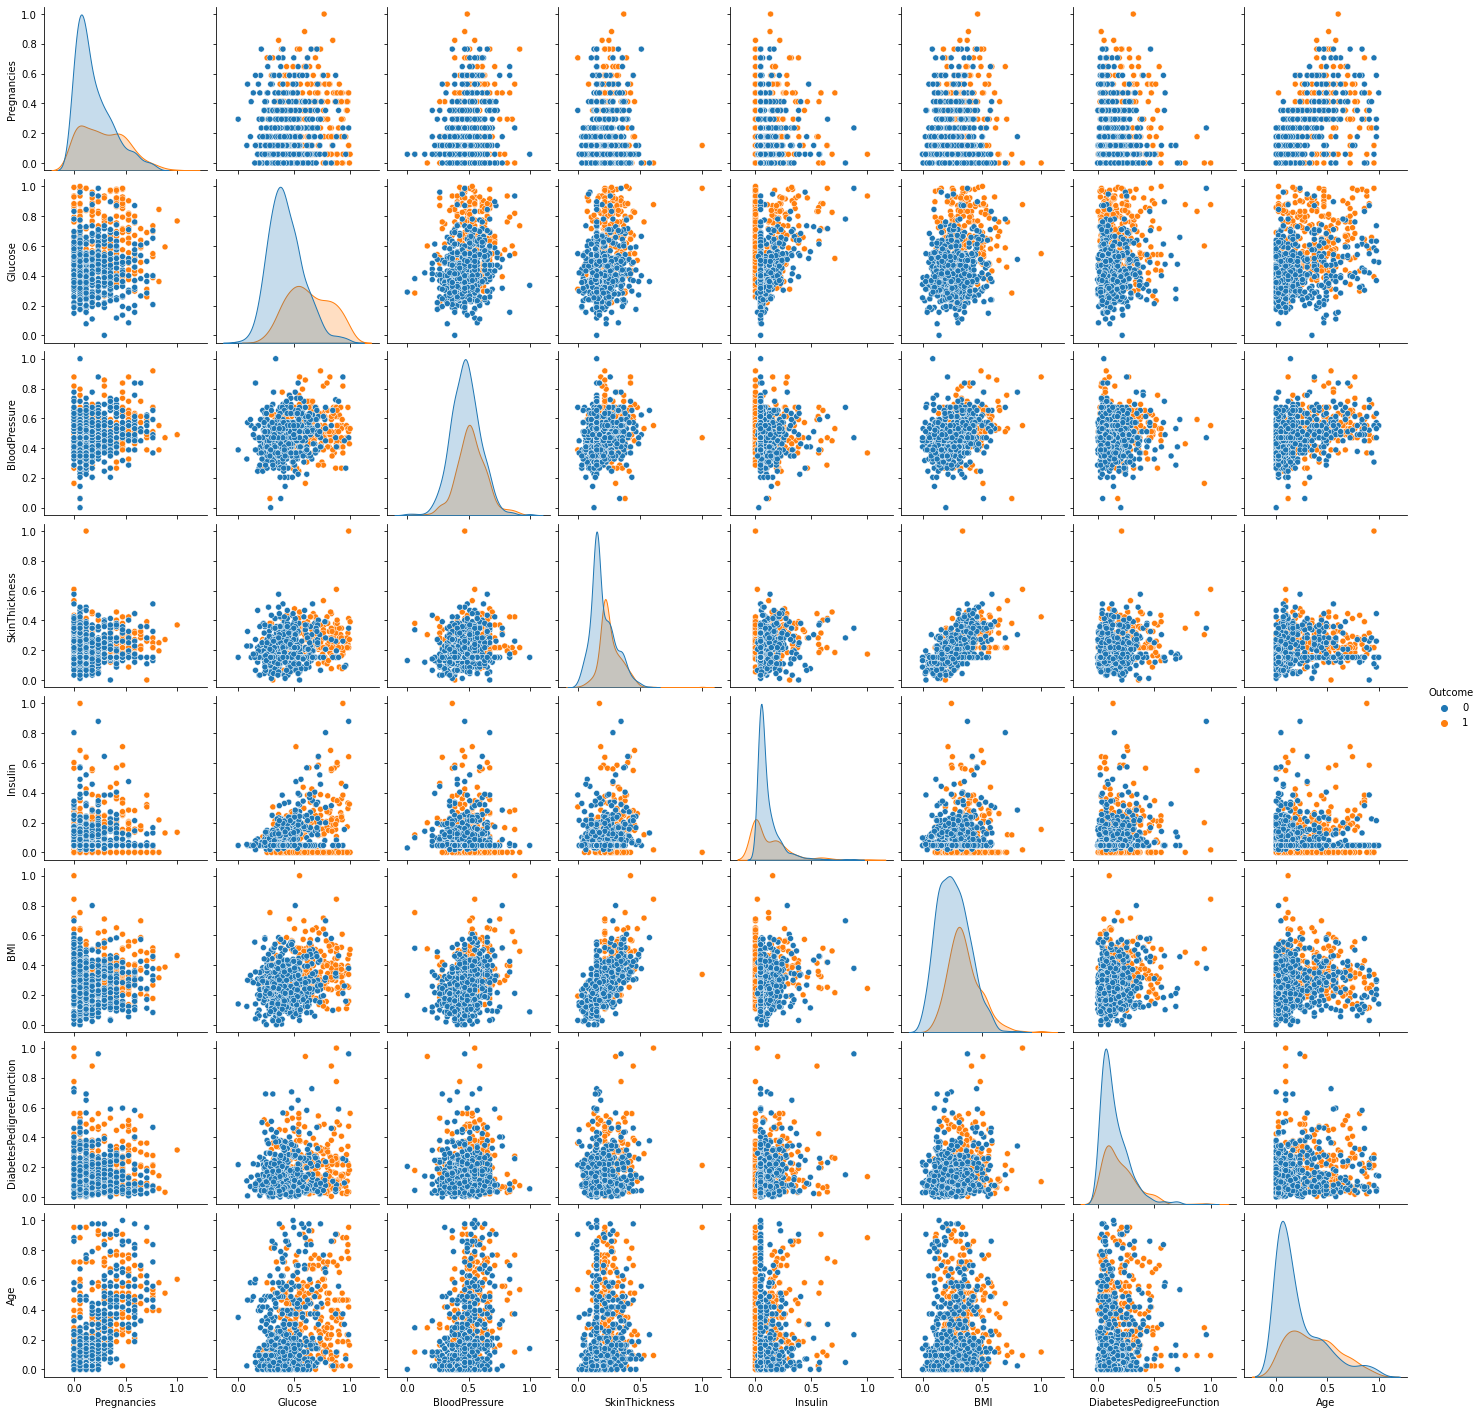

In [59]:
sns.pairplot(df_b, hue='Outcome')

In [60]:
df_b.iloc[:, :-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.000000,0.314928,0.234415,0.674419
2,0.470588,0.896774,0.408163,0.217391,0.000000,0.104294,0.253629,0.255814
4,0.000000,0.600000,0.163265,0.304348,0.198582,0.509202,0.943638,0.279070
6,0.176471,0.219355,0.265306,0.271739,0.104019,0.261759,0.072588,0.116279
8,0.117647,0.987097,0.469388,0.413043,0.641844,0.251534,0.034159,0.744186
...,...,...,...,...,...,...,...,...
762,0.529412,0.290323,0.387755,0.152174,0.046099,0.087935,0.027327,0.279070
763,0.588235,0.367742,0.530612,0.445652,0.212766,0.300613,0.039710,0.976744
764,0.117647,0.503226,0.469388,0.217391,0.046099,0.380368,0.111870,0.139535
765,0.294118,0.496774,0.489796,0.173913,0.132388,0.163599,0.071307,0.209302


In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_b.iloc[:, :-1], df_b.iloc[:, -1], test_size = 0.20, random_state = 45)

In [62]:
#imbalance data
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [63]:
x_train, y_train = smt.fit_resample(x_train, y_train)

In [64]:
np.bincount(y_train)

array([388, 388])

In [65]:
knn = KNeighborsClassifier(n_neighbors=2)

In [66]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [68]:
pred=knn.predict(x_test)

In [69]:
pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [70]:
print(confusion_matrix(y_test, pred))

[[87 13]
 [24 27]]


In [71]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.68      0.53      0.59        51

    accuracy                           0.75       151
   macro avg       0.73      0.70      0.71       151
weighted avg       0.75      0.75      0.75       151



In [72]:
#splitting the data to normalize the independent variable


In [73]:
clf_l = LogisticRegression(random_state=0)

In [74]:
clf_l.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [75]:
y_pred_lr = clf_l.predict(x_test)

In [76]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_l.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [77]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [78]:
print(f1_score(y_test, y_pred_lr, average="macro"))
print(precision_score(y_test, y_pred_lr, average="macro"))
print(recall_score(y_test, y_pred_lr, average="macro"))

0.7299008943678994
0.7271859488354333
0.7333333333333334


In [78]:
#cntr + shift + space
# ctrl + m +b

In [79]:
#Model for SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)

SVC()

In [81]:
y_pred_sv = classifier_rbf.predict(x_test)

In [82]:
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.77


In [89]:
print(f1_score(y_test, y_pred_lr, average="macro"))
print(precision_score(y_test, y_pred_lr, average="macro"))
print(recall_score(y_test, y_pred_lr, average="macro"))

0.7299008943678994
0.7271859488354333
0.7333333333333334


In [92]:
#RANDOM FOREST
model = RandomForestClassifier(n_estimators=300, bootstrap= True, max_features= 'sqrt')

In [93]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [96]:
y_pred_rf = model.predict(x_test)

In [99]:
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of Random Forest on test set: 0.93


In [100]:
#NAIVE BAYES
gnb = GaussianNB()

In [101]:
gnb.fit(x_train, y_train)

GaussianNB()

In [102]:
y_predi = gnb.predict(x_test)

In [103]:
from sklearn import metrics

In [106]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_predi)*100)

Gaussian Naive Bayes model accuracy(in %): 75.49668874172185


In [107]:
labels = ['K_Nearest_Neighbor', 'Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes']

In [109]:
voting_clf=VotingClassifier(estimators=[(labels[0], knn), (labels[1], clf_l), (labels[2], classifier_rbf), (labels[3], model), (labels[4], gnb)], voting ='hard')

In [110]:
update_labels = ['K_Nearest_Neighbor', 'Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'Voting_ens']

In [113]:
for(clf, label) in zip([knn, clf_l, classifier_rbf, model, gnb, voting_clf], update_labels):
    scores_f=model_selection.cross_val_score(clf, x_train, y_train, cv=5)
    print('accuracy: %0.2f (+/- %0.2f) [%s]'
    %(scores_f.mean(),scores_f.std(),label))

accuracy: 0.80 (+/- 0.07) [K_Nearest_Neighbor]
accuracy: 0.76 (+/- 0.02) [Logistic Regression]
accuracy: 0.80 (+/- 0.03) [SVM]
accuracy: 0.91 (+/- 0.03) [Random Forest]
accuracy: 0.73 (+/- 0.03) [Naive Bayes]
accuracy: 0.83 (+/- 0.03) [Voting_ens]


In [114]:
parameters= {'kernel':('linear','rbf'), 'C':[1,10]}

In [115]:
svc_l = svm.SVC()

In [116]:
clf_s = GridSearchCV(svc_l, parameters)

In [117]:
clf_s.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [118]:
clf_s.best_score_

0.801571546732837

In [121]:
param_grid = {'n_neighbors': np.arange(1,25)}

In [125]:
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

In [126]:
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [128]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [129]:
knn_gscv.best_score_

0.8157650951199338

In [131]:
grid_values = {'penalty':['l1', 'l2'], 'C':[0.001, 0.009,0.01,0.09,1,5,10,25]}

In [132]:
grid_clf_acc = GridSearchCV(clf_l, param_grid = grid_values )

In [133]:
grid_clf_acc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']})

In [134]:
y_pred_acc = grid_clf_acc.predict(x_test)

In [135]:
#New Model Evaluation metrics
print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred_acc)))
print('Precision Score: ' + str(precision_score(y_test, y_pred_acc)))
print('Recall Score: ' + str(recall_score(y_test, y_pred_acc)))
print('F1 Score: ' + str(f1_score(y_test, y_pred_acc)))

Accuracy Score: 0.7748344370860927
Precision Score: 0.6491228070175439
Recall Score: 0.7254901960784313
F1 Score: 0.6851851851851852


In [136]:
confusion_matrix(y_test, y_pred_acc)

array([[80, 20],
       [14, 37]])

In [137]:
param_gr = {
    'n_estimators' :[100,200,300,1000]
}

In [138]:
gs_rf = GridSearchCV(estimator = model, param_grid = param_gr, cv = 5)

In [139]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=300),
             param_grid={'n_estimators': [100, 200, 300, 1000]})

In [140]:
gs_rf.best_score_

0.9085028949545079

In [141]:
params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}

In [143]:
nb_grid = GridSearchCV(gnb, param_grid = params_NB, cv=5)

In [144]:
nb_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [145]:
nb_grid.best_score_

0.7370885028949545

In [146]:
labels_gs = ['K_Nearest_Neighbor', 'Logistic Regression', 'SVM', 'Random Forrest', 'Naive Bayes']

In [150]:
voting_Sg=VotingClassifier(estimators=[(labels[0], knn_gscv), (labels[1], grid_clf_acc), (labels[2], clf_s), (labels[3], gs_rf),(labels[4], nb_grid)], voting ='hard')

In [153]:
labels_gs_f = ['K_Nearest_Neibhor', 'Logistic Regression', 'SVM','Random Forest', 'Naive Bayes','Voting']

In [154]:
for(clf, label) in zip([knn_gscv,grid_clf_acc,clf_s, gs_rf, nb_grid, voting_Sg], labels_gs_f):
  scores_f = model_selection.cross_val_score(clf, x_train, y_train, cv=5)
  print('accuracy: %0.2f (+- %0.2f) [%s]'
  %(scores_f.mean(),scores_f.std(),label))

accuracy: 0.81 (+- 0.05) [K_Nearest_Neibhor]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

accuracy: 0.77 (+- 0.04) [Logistic Regression]
accuracy: 0.80 (+- 0.05) [SVM]
accuracy: 0.91 (+- 0.03) [Random Forest]
accuracy: 0.74 (+- 0.02) [Naive Bayes]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

accuracy: 0.83 (+- 0.04) [Voting]


In [160]:
for(clf, label) in zip([knn_gscv,grid_clf_acc,clf_s,gs_rf, nb_grid,voting_Sg],labels_gs_f):
    scores_f=model_selection.cross_val_score(clf, x_train, y_train, scoring='f1', cv=5)
    print('F1 Score: %0.2f (+/- %0.2f) [%s]'
    %(scores_f.mean(),scores_f.std(),label))

F1 Score: 0.82 (+/- 0.05) [K_Nearest_Neibhor]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

F1 Score: 0.76 (+/- 0.04) [Logistic Regression]
F1 Score: 0.80 (+/- 0.05) [SVM]
F1 Score: 0.91 (+/- 0.03) [Random Forest]
F1 Score: 0.72 (+/- 0.02) [Naive Bayes]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

F1 Score: 0.84 (+/- 0.04) [Voting]


In [161]:
for(clf, label) in zip([knn_gscv,grid_clf_acc, clf_s, gs_rf, nb_grid,voting_Sg],labels_gs_f):
    scores_f=model_selection.cross_val_score(clf, x_train, y_train, scoring='recall',cv=5)
    print('Recall Score: %0.2f (+/- %0.2f) [%s]'
    %(scores_f.mean(),scores_f.std(),label))

Recall Score: 0.89 (+/- 0.08) [K_Nearest_Neibhor]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Recall Score: 0.77 (+/- 0.07) [Logistic Regression]
Recall Score: 0.82 (+/- 0.07) [SVM]
Recall Score: 0.91 (+/- 0.04) [Random Forest]
Recall Score: 0.68 (+/- 0.03) [Naive Bayes]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Recall Score: 0.86 (+/- 0.05) [Voting]


In [162]:
for(clf, label) in zip([knn_gscv,grid_clf_acc,clf_s,gs_rf, nb_grid,voting_Sg],labels_gs_f):
    scores_f=model_selection.cross_val_score(clf, x_train, y_train, scoring='precision', cv=5)
    print('Precision Score: %0.2f (+/- %0.2f) [%s]'
    %(scores_f.mean(),scores_f.std(),label))

Precision Score: 0.76 (+/- 0.04) [K_Nearest_Neibhor]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Precision Score: 0.77 (+/- 0.04) [Logistic Regression]
Precision Score: 0.78 (+/- 0.04) [SVM]
Precision Score: 0.89 (+/- 0.02) [Random Forest]
Precision Score: 0.77 (+/- 0.03) [Naive Bayes]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Precision Score: 0.81 (+/- 0.04) [Voting]


In [163]:
voting_Sg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

VotingClassifier(estimators=[('K_Nearest_Neighbor',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(n_neighbors=2),
                                           param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})),
                             ('Logistic Regression',
                              GridSearchCV(estimator=LogisticRegression(random_state=0),
                                           param_grid={'C': [0.001, 0.009, 0.01,
                                                             0.09, 1, 5, 10,
                                                             25],
                                                       'pen...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08

In [164]:
y_pred_v = voting_Sg.predict(x_test)

In [165]:
confusion_matrix(y_test, y_pred_v)

array([[86, 14],
       [10, 41]])

In [168]:
rf_auc = roc_auc_score(y_test, y_pred_rf)
nb_auc = roc_auc_score(y_test, y_predi)
sv_auc = roc_auc_score(y_test, y_pred_sv)
knn_auc = roc_auc_score(y_test, pred)
lr_auc = roc_auc_score(y_test, y_pred_lr)

In [169]:
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print ('SVC: AUROC = %0.3f' % (sv_auc))
print('KNN: AUROC = %0.3f' % (knn_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))  

Random Forest: AUROC = 0.916
Naive Bayes: AUROC = 0.729
SVC: AUROC = 0.768
KNN: AUROC = 0.700
Logistic Regression: AUROC = 0.733


In [170]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_predi)
sv_fpr, sv_tpr, _ = roc_curve(y_test, y_pred_sv)
knn_fpr, knn_tpr, _ = roc_curve(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_lr)


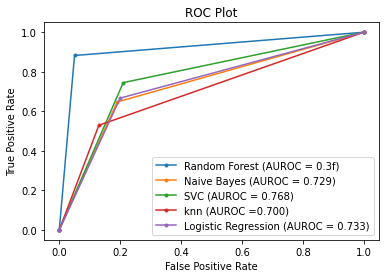

In [175]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = 0.3f)' %rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' %nb_auc)
plt.plot(sv_fpr, sv_tpr, marker='.', label='SVC (AUROC = %0.3f)' % sv_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (AUROC =%0.3f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel ('True Positive Rate')
# Show legend
plt.legend()
#Show plt
plt.show()

In [176]:
vot_auc = roc_auc_score(y_test, y_pred_v)

In [177]:
print('Voting: ROC =%.3f' % (vot_auc))

Voting: ROC =0.832
